<a href="https://colab.research.google.com/github/DrewRust/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/U1S3M2_Andrew_Rust_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import math
import numpy as np
import pandas as pd

In [0]:
sales_num = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
def mean_var_std_func(your_list):
  
  theSum = 0
  for i in your_list:
    theSum = theSum + i
  
  mean = theSum/len(your_list)
  
  new_sum = 0
  for i in your_list:
    after_sub = i - mean
    after_sqr = after_sub**2
    new_sum += after_sqr
  
  variance = new_sum/len(your_list)
  stdev = variance**0.5

  three_mean_var_stdv = [mean, variance, stdev]
  return three_mean_var_stdv

In [40]:
print(mean_var_std_func(sales_num))

[3052.714285714286, 183761.06122448976, 428.67360686714756]


Everything should match the library functions and it does.

In [41]:
print(np.mean(sales_num))
print(np.var(sales_num))
print(np.std(sales_num))

3052.714285714286
183761.06122448976
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
cust_in_store = [127, 80, 105, 92, 120, 115, 93]

In [43]:
# using numpy
print('{:.2f}'.format(np.cov(sales_num, cust_in_store)[0][1]))

7604.36


In [0]:
# using pandas
df = pd.DataFrame({"sales_num": sales_num})
df['cust_in_store'] = pd.Series(cust_in_store)

In [45]:
df

,sales_num,cust_in_store
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [46]:
# Using column 1 and column two as arguments.
print('{:.2f}'.format(df.cov().values[0][1]))

7604.36


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
std_cust = np.std(cust_in_store)

In [48]:
print("Standard Dev of customers: " + str(std_cust))

Standard Dev of customers: 15.792015549069118


In [0]:
three_list = (mean_var_std_func(cust_in_store))

In [50]:
print(three_list[2])

15.792015549069118


In [51]:
# Calculate the standard dev of both lists using pandas.
std_s = df['sales_num'].std(ddof=0)
std_c = df['cust_in_store'].std(ddof=0)
print('{:.4f}'.format(std_s))
print('{:.4f}'.format(std_c))

428.6736
15.7920


In [52]:
# Calculate the standard dev of both lists using pandas.
std_s = df['sales_num'].std(ddof=1)
std_c = df['cust_in_store'].std(ddof=1)
print('{:.4f}'.format(std_s))
print('{:.4f}'.format(std_c))

463.0204
17.0573


In [53]:
# Calculate covariance using pandas
cov_sc = df['sales_num'].cov(df['cust_in_store'])
print('{:.4f}'.format(cov_sc))

7604.3571


In [0]:
# Calculate the denominator
denom = std_s * std_c

In [55]:
# Calculate correlation
corr_sc = cov_sc/denom
print('{:.6f}'.format(corr_sc))

0.962834


In [56]:
## Check work using pandas
print('{:.6f}'.format(df['sales_num'].corr(df['cust_in_store'])))

0.962834


In [57]:
df.corr()

,sales_num,cust_in_store
sales_num,1.000000,0.962834
cust_in_store,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv"
# index_col=0 
# above is important otherwise it returns an unnamed column.
titanic_df = pd.read_csv(url, index_col=0)

In [59]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_titanic_df = titanic_df.select_dtypes(include=numerics)

In [61]:
numeric_titanic_df.head()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [62]:
numeric_titanic_df.isnull().sum()

pclass                 1
survived               1
age                    0
sibsp                  1
parch                  1
fare                   2
body                1189
has_cabin_number       0
dtype: int64

In [63]:
numeric_titanic_df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [64]:
numeric_titanic_df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

**The Synonym for orthogonal is Perpendicular.**

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
vector_a = [0, 4]
vector_b = [-5, 0]

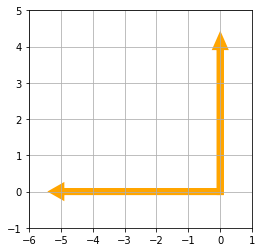

In [67]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-6,1)          
plt.ylim(-1,5)

# Plot the vectors
for vect in [vector_a, vector_b]:
    plt.arrow(0,0, vect[0], vect[1], head_width=.2, head_length=0.2, linewidth=7, color = 'orange')
plt.show()

In [68]:
# The above vectors - vector_a and vector_b ARE INDEED orthogonal as seen in the graph
# ... and the dot product is zero.
np.dot(vector_a, vector_b)

0

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

##No, see below:

**The vectors a and b are NOT orthogonal because the dot product is NOT equal to zero.  It's equal to -40.**

In [69]:
# If dot product != 0, then the vectors are NOT orthogonal.
a = np.array([-5, 3, 7])
b = np.array([6,-8, 2])
np.dot(a,b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

In [71]:
norm_c = np.linalg.norm(c)
print(norm_c)
print(norm_c**2)

25.787593916455254
665.0


In [72]:
np.dot(c, c)

665

In [73]:
pd.DataFrame(c)

,0
0,2
1,-15
2,6
3,20


In [74]:
pd.DataFrame(c.T)

,0
0,2
1,-15
2,6
3,20


In [75]:
c * c

array([  4, 225,  36, 400])

**They all have in common they're essentially squaring c.**

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

###\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}
<br>

###\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
import numpy as np

In [0]:
# create a list then turn into a np array below
f = [4, 12, 11, 9, 2]

In [0]:
# turn these lists into numpy arrays now we can do mathmatical operation
np_f = np.array(f)

In [79]:
np.linalg.norm(np_f)

19.131126469708992

In [80]:
f_hat = np_f/np.linalg.norm(np_f)
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [81]:
# rounding to 2 digits otherwise it gives me .999999etc
round(np.linalg.norm(f_hat), 2)

1.0

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

##Linearly Dependent:

In [0]:
# Linearly Dependent
u = [2, -1]
v = np.multiply(u, 2)

In [83]:
print(u)
print(v)

[2, -1]
[ 4 -2]


In [0]:
u_v = np.array([[2, -1],
             [4, -2]])

In [85]:
# A Determinant at zero means linear dependence
np.linalg.det(u_v)

0.0

In [86]:
print(u, '\n', v)

[2, -1] 
 [ 4 -2]


In [0]:
import matplotlib.pyplot as plt

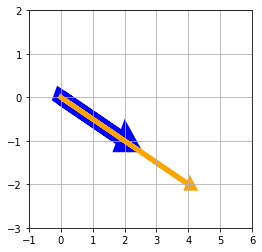

In [88]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1,6)          
plt.ylim(-3,2)

for myvect, mycolor, width in [(u, 'blue', 15), (v, 'orange', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

##Linearly Independent

In [89]:
# Linearly independent vectors, not orthogonal
vector_x = np.random.randint(low=-3, high=3, size=2)
vector_m = np.random.randint(low=-3, high=3, size=2)
print(vector_x, '\n', vector_m)

[0 2] 
 [-2  0]


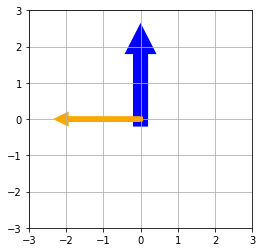

In [90]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

# Plot the vectors
for myvect, mycolor, width in [(vector_x, 'blue', 15), (vector_m, 'orange', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

###Suppose we have two vectors. The linear combination is as follows, where g and h are any scalars.

\begin{align}
g\begin{bmatrix} 1 & 2 \end{bmatrix} +
h\begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

Note that:
* The set of all possible linear combinations (i.e., all possible values of g and h) is the span of these vectors. 
* A set of vectors _spans_ a space if their linear combinations fill the space.
* The span of most pairs of 2D vectors is the entire infinite sheet of infinite space (unless they are colinear). 

In [0]:
# R squared
import numpy as np
g = np.array([1,2])
h = np.array([4,8])

In [92]:
# This is one possible linear combination:
# a and b are any scalars
a,b = (2,3)
linear_combo= np.multiply(g, a) + np.multiply(h, b) 
linear_combo

array([14, 28])

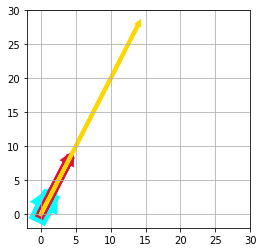

In [93]:
# R cubbed
# Plot them on a grid
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,30)          
plt.ylim(-2,30)

# Plot the vectors
for myvect, mycolor, width in [(g, 'cyan', 18), (h, 'crimson', 9), (linear_combo, 'gold', 4)]:
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width=.2,
            head_length=0.2,
            linewidth=width,
            color=mycolor)

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# R squared
import numpy as np
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])

In [95]:
# This is one possible linear combination:
# a and b are any scalars
a, b, c = (2, 3, 4)
linear_combo= np.multiply(l, a) + np.multiply(m, b) + np.multiply(n, c) 
linear_combo

array([15, 36, 35])

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



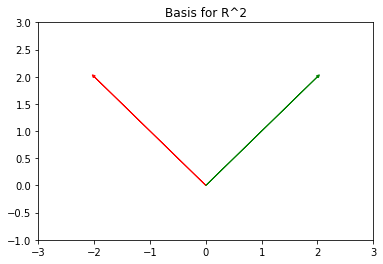

In [96]:
# find basis vectors in 2-d
vector_1 = [-2, 2]
vector_2 = [2, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

In 2-dimensional space $\mathbb{R}^2$, ANY vector (a,b) can be decomposed as the linear combination of the basis vectors (1,0) and (0,1). Since these are unit vectors, they are called "orthonormal basis".

(a,b) = a(1,0) + b(0,1)

# Basis

The basis of a vector space $V$ is a set of vectors that are linearly independent and that span the vector space $V$.

A set of vectors spans a space if their linear combinations fill the space.

For example, the unit vectors in the "Linearly Independent Vectors" plot above form a basis for the vector space $\mathbb{R}^2$ becayse they are linearly independent and span that space.

## Orthogonal Basis

An orthogonal basis is a set of vectors that are linearly independent, span the vector space, and are orthogonal to each other. Remember that vectors are orthogonal if their dot product equals zero.

## Orthonormal Basis

An orthonormal basis is a set of vectors that are linearly independent, span the vector space, are orthogonal to eachother and each have unit length. 

For more on this topic (it's thrilling, I know) you might research the Gram-Schmidt process -which is a method for orthonormalizing a set of vectors in an inner product space.

The unit vectors form an orthonormal basis for whatever vector space that they are spanning.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

**The Rank of P is 3.**

In [97]:
P = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])
print(P)
np.linalg.matrix_rank(P)

[[ 1  2  3]
 [-1  0  7]
 [ 4  8  2]]


3

## 7.2 What does the rank of a matrix tell us?

**Rank tells us the number of dimensions in the output of a matrix that's used for linear transformation.**

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v = [1, 3] 
w = [-1, 2]
proj = [2,6]

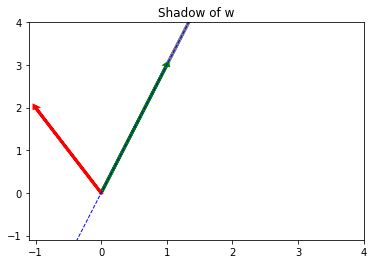

In [107]:
# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Shadow of w")
plt.show()

In [108]:
(axes.get_xlim())

(-1.1, 4.0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


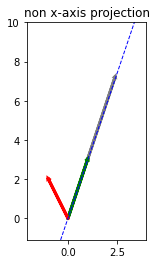

In [109]:
# Axis Bounds
plt.xlim(-2.1,4)          
plt.ylim(-1.1,10)

# Original Vector
v = [1, 3] 
w = [-1, 2]
# v = [1,1/2] 
# w = [2,2]
proj = np.multiply(2.4,v)

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 2.95*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("non x-axis projection")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

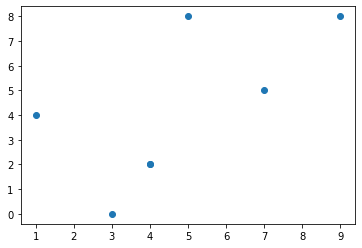

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()